 <font size=3>简单而言，对于给定的训练数据，朴素贝叶斯先基于特征条件独立假设学习输入和输出的联合概率分布，然后基于此分布对于新的实例，利用贝叶斯定理计算出最大的后验概率。朴素贝叶斯不会直接学习输入输出的联合概率分布，而是通过学习**类的先验概率和类条件概率来完成**。

<font size=3>$p(不帅、性格不好、身高矮、不上进|嫁) = p(不帅|嫁)*p(性格不好|嫁)*p(身高矮|嫁)*p(不上进|嫁)$，那么我就要分别统计后面几个概率，也就得到了左边的概率！等等，为什么这个成立呢？学过概率论的同学可能有感觉了，这个等式成立的条件需要**特征之间相互独立**吧！对的！这也就是为什么朴素贝叶斯分类有**朴素**一词的来源，朴素贝叶斯算法是假设各个特征之间相互独立，那么这个等式就成立了！

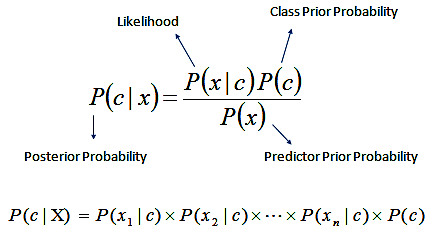

<font size = 3>最后给定新的实例，计算其对应的最大后验概率，然后判断其所属的类别：

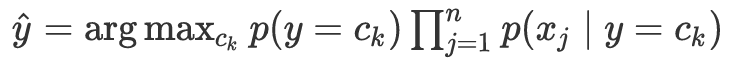

<font size=3>优点：（1） 算法逻辑简单,易于实现 （2）分类过程中时空开销小缺点：
    
理论上，朴素贝叶斯模型与其他分类方法相比具有最小的误差率。但是实际上并非总是如此，这是因为朴素贝叶斯模型假设属性之间相互独立，这个假设在实际应用中往往是不成立的，在属性个数比较多或者属性之间相关性较大时，分类效果不好。


In [1]:
import numpy as np
import pandas as pd

In [2]:

x1 = [1,1,1,1,1,2,2,2,2,2,3,3,3,3,3]
x2 = ['S','M','M','S','S','S','M','M','L','L','L','M','M','L','L']
y = [-1,-1,1,1,-1,-1,-1,1,1,1,1,1,1,1,-1]

df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
df.head()

,x1,x2,y
0,1,S,-1
1,1,M,-1
2,1,M,1
3,1,S,1
4,1,S,-1


In [3]:
X = df[['x1', 'x2']]
y = df[['y']]

In [6]:
y[y.columns[0]].value_counts()

 1    9
-1    6
Name: y, dtype: int64

In [9]:
for col in X.columns:
    print(col)

x1
x2


In [11]:
X[(y==1).values]['x1'].value_counts()

3    4
2    3
1    2
Name: x1, dtype: int64

In [4]:
def nb_fit(X, y):
    classes = y[y.columns[0]].unique() #类别
    class_count = y[y.columns[0]].value_counts() #1：9；-1：6
    class_prior = class_count/len(y) #类别比例
    
    prior = dict()
    for col in X.columns:
        for j in classes:
            p_x_y = X[(y==j).values][col].value_counts() #各个y值对应的各个feature的value_counts
            for i in p_x_y.index:
                prior[(col, i, j)] = p_x_y[i]/class_count[j]
                #('x1', 1, -1): 0.5表示x1特征中取值为1且标签为-1的比例，每个col和j的加起来为1
    return classes, class_prior, prior

In [7]:
nb_fit(X, y)

(array([-1,  1], dtype=int64),
  1    0.6
 -1    0.4
 Name: y, dtype: float64,
 {('x1', 1, -1): 0.5,
  ('x1', 2, -1): 0.3333333333333333,
  ('x1', 3, -1): 0.16666666666666666,
  ('x1', 3, 1): 0.4444444444444444,
  ('x1', 2, 1): 0.3333333333333333,
  ('x1', 1, 1): 0.2222222222222222,
  ('x2', 'S', -1): 0.5,
  ('x2', 'M', -1): 0.3333333333333333,
  ('x2', 'L', -1): 0.16666666666666666,
  ('x2', 'L', 1): 0.4444444444444444,
  ('x2', 'M', 1): 0.4444444444444444,
  ('x2', 'S', 1): 0.1111111111111111})

In [12]:
def predict(X_test):
    res = []
    for c in classes:
        p_y = class_prior[c]
        p_x_y = 1
        for i in X_test.items():
            p_x_y *= prior[tuple(list(i)+[c])]
        res.append(p_y*p_x_y) #p_x_y是上面公式右边的部分，p_y是左边的部分
    return classes[np.argmax(res)]

In [15]:
for i in X_test.items():
    print(list(i))

['x1', 2]
['x2', 'S']


In [13]:
X_test = {'x1': 2, 'x2': 'S'}
classes, class_prior, prior = nb_fit(X, y)
print('测试数据预测类别为：', predict(X_test))

测试数据预测类别为： -1
